In [1]:
import intdiff as id

sol = id.getTFScreeningFunction()

Solved in 7 iterations, number of nodes 100014, maximum relative residual 6.88e-04.
0
True


In [2]:
print(sol)

In [3]:
import numpy as np
import scipy.interpolate as inter

#get the function g
gxi = lambda x: id.g(x,'smooth',sol)[0]
gmesh = np.arange(0.1,100,0.01)
#gmesh = np.arange(1,100,1)
gxiv = np.vectorize(gxi)
gvec = gxiv(gmesh)
print(np.shape(gvec))

g = inter.InterpolatedUnivariateSpline (gmesh, gvec, k=3)

gsol = lambda x: g(x)

/home/phys/villaa/python/anaconda3/envs/py365/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/home/phys/villaa/python/anaconda3/envs/py365/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  warnings.warn(msg, IntegrationWarning)


(9990,)


In [4]:
#set up a plot 
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
#got smarter about the mpl config: see mplstyles/ directory
plt.style.use('standard')

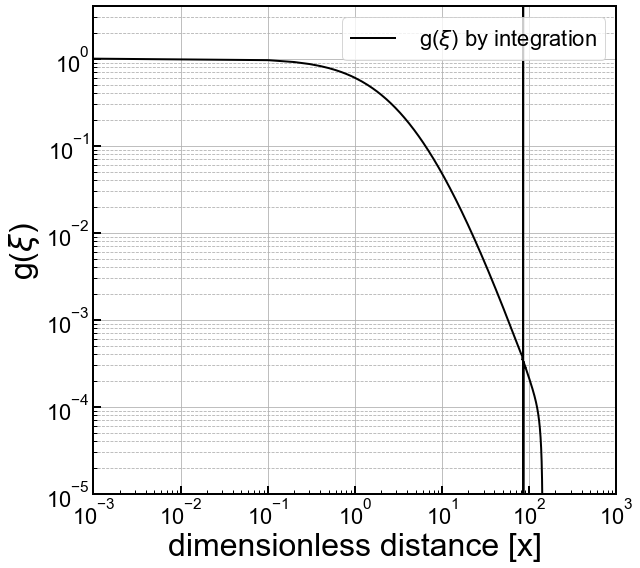

In [5]:
#set up a plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes


dx=0.1
X  = np.arange(0.001,1000,dx)


ax1.plot (X, gsol(X), 'k-', label=' g($\\xi$) by integration')

#ax1.plot (X, tau_3v(X), 'g-', label='$\tau$$_3$')
#ax1.plot (X, ylind(X), 'k--', label='Lindhard')
#ax1.plot (X[X>0],ysingle(X[X>0]),'k-',linewidth=1)


ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlim(0.001,1000)
ax1.set_ylim(1e-5,4)
ax1.set_xlabel('dimensionless distance [x]',**axis_font)
ax1.set_ylabel('g($\\xi$)',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/gxi_smooth.png')
plt.show()

In [6]:
#lam2 = lambda x: id.lam(x,'smooth',sol)**2
lam2 = lambda x: id.lam(x,'gotg',g)**2

lam2v = np.vectorize(lam2)
X = np.arange(0.001,10,0.0005)
cut = (X>0.9) & (X<1.2)
print(np.max(lam2v(X[cut])))

diff = -1*np.gradient(lam2v(X),X)
print(np.max(diff[cut]))

0.19957183556021285
0.36711099368966416


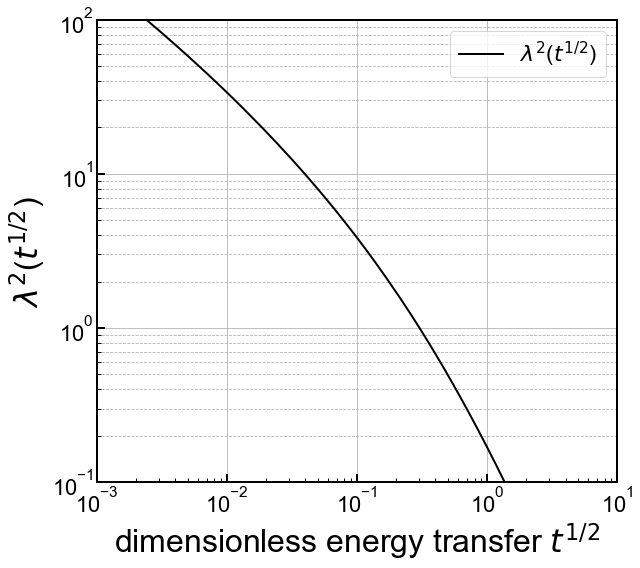

In [7]:
#set up a plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

dx=0.001
xmax = 10
X  = np.arange(0.0001,xmax,dx)


ax1.plot (X, lam2v(X), 'k-', label='$\lambda^2$($t^{1/2}$)')

#zoom
#ax1.set_yscale('linear')
#ax1.set_xscale('linear')
#ax1.set_xlim(0.1, 2)
#ax1.set_ylim(0.1,0.2)


ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlim(0.001, xmax)
ax1.set_ylim(1e-1,100)

ax1.set_xlabel('dimensionless energy transfer $t^{1/2}$',**axis_font)
ax1.set_ylabel('$\lambda^2$($t^{1/2}$)',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/lambda_smooth.png')
plt.show()

In [8]:
#get g(xi) for the smooth functions we just computed
g_precise = lambda x: id.g(x,'smooth',sol)

g_approx = lambda x: id.g(x,'numeric')

print(g_precise(1))
print(g_approx(1))

(0.6047766882313054, 9.070009777368464e-07)
(0.688197544420046, 0.00046274698503157496)


In [9]:
#try the rutherford cross section
rsol = lambda x: [1,0]
fruth = id.ft12('smooth',rsol,xmin=1,dx=0.1)

#get the f function
#f = id.ft12('gotg',gsol,xmin=0.001,dx=0.0005)
f = id.ft12('gotg',gsol,xmin=0.001,dx=0.1)
#f = id.ft12('smooth',sol,xmin=0.001,dx=0.0005)
#f = id.ft12('smooth',sol,xmin=0.01,dx=0.005)

In [10]:
print(f(1))
print(fruth(1))

0.27866973728059447
0.4830219820603507


In [11]:
#get the f function from the paper
import dataPython as dp
import numpy as np
data = dp.getXYdata('data/lindhard-f.txt')
data_0 = dp.getXYdata('data/lindhard-f-twocol.txt')

#convert to numpy arrays
t12 = np.asarray(data['xx'])
ft12 = np.asarray(data['yy'])
t120 = np.asarray(data_0['xx'])
ft120 = np.asarray(data_0['yy'])

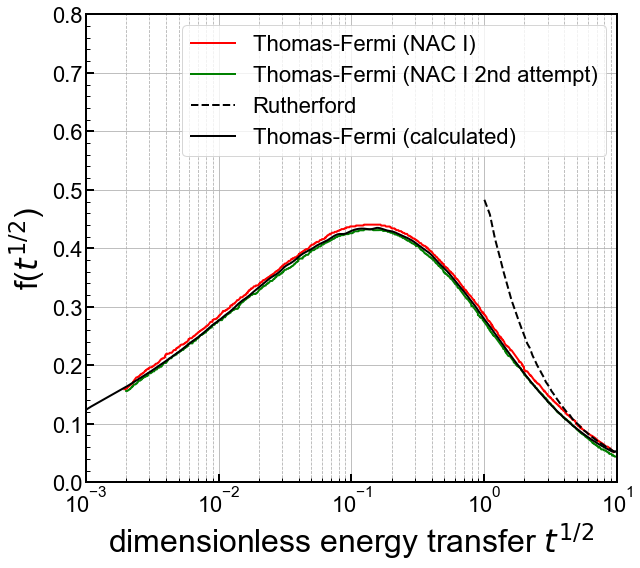

In [12]:
#set up a plot

fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes


dx=0.001
xmax = 10
X  = np.arange(0.0001,xmax,dx)
Xh  = np.arange(1.0,xmax,0.1)

diff = -1*X**2*np.gradient(lam2v(X),X)

#ax1.plot (X, diff, 'm-', label='Thomas-Fermi (newgrad)')
ax1.plot (t12, ft12, 'r-', label='Thomas-Fermi (NAC I)')
ax1.plot (t120, ft120, 'g-', label='Thomas-Fermi (NAC I 2nd attempt)')
ax1.plot (Xh, fruth(Xh), 'k--', label='Rutherford')
ax1.plot (X, f(X), 'k-', label='Thomas-Fermi (calculated)')
#ax1.plot (X, diff, 'm-', label='Thomas-Fermi (newgrad)')



ax1.set_yscale('linear')
ax1.set_xscale('log')
ax1.set_xlim(0.001, xmax)
ax1.set_ylim(0,0.8)
ax1.set_xlabel('dimensionless energy transfer $t^{1/2}$',**axis_font)
ax1.set_ylabel('f($t^{1/2}$)',**axis_font)
ax1.grid(True)
ax1.xaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/f_TF_smooth.png')
plt.show()